In [4]:
import numpy as np
import numpy
from numpy import pi
import numpy
import scipy
import qiskit
from scipy.stats import unitary_group
from qiskit import transpile
import scipy.linalg as sl
import numpy.linalg as nl
from scipy.linalg import cossin
from qiskit.quantum_info import Operator, Statevector
from qiskit import QuantumCircuit
from qiskit.circuit.library import UGate,UCPauliRotGate
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator
import sys
sys.path.append('./src')
##
import utils_synth
import oracle_synth
import lcu
import lchs
import _quick_test
import importlib
importlib.reload(lcu)
importlib.reload(lchs)
importlib.reload(utils_synth)
importlib.reload(oracle_synth)
importlib.reload(_quick_test)
##
from utils_synth import *
from oracle_synth import *
from lchs import *
from src.lcu import *
from _quick_test import *

rng = numpy.random.default_rng(4290962056973923694427)
np.set_printoptions(precision=8, suppress=True)

XX = numpy.kron(X(), X())
YY = numpy.kron(Y(), Y())
ZZ = numpy.kron(Z(), Z())

In [37]:
seed = 10
rng = numpy.random.default_rng(seed)
def test_case(axis, num_qubits):
    angle = rng.random(1)[0]*2*numpy.pi

    my_circ = qiskit.QuantumCircuit(num_qubits)
    mc_rot(my_circ, axis, angle, list(range(num_qubits-1)), num_qubits-1)

    my_op = qiskit.quantum_info.Operator(my_circ).data
    my_op_counts = dict(qiskit.transpile(my_circ, basis_gates=['cx','u'], optimization_level=2).count_ops())

    qis_circ = qiskit.QuantumCircuit(num_qubits)
    if axis == 'X':
        qis_circ.append( qiskit.circuit.library.RXGate(angle).control(num_qubits-1), range(num_qubits) )
    elif axis == 'Y':
        qis_circ.append( qiskit.circuit.library.RYGate(angle).control(num_qubits-1), range(num_qubits) )
    elif axis == 'Z':
        qis_circ.append( qiskit.circuit.library.RZGate(angle).control(num_qubits-1), range(num_qubits) )
    qis_op = qiskit.quantum_info.Operator(qis_circ).data
    qis_op_count = dict(qiskit.transpile(qis_circ, basis_gates=['cx','u'], optimization_level=2).count_ops())

    error = numpy.linalg.norm( my_op - qis_op )
    print("  - Error", error, "  angle=", angle)
    print("  - CX Count (Qiskit vs. Mine) - CX ", qis_op_count['cx'],'vs.', my_op_counts['cx'], "  - U", qis_op_count['u'],'vs.', my_op_counts['u'])
    assert(error < 1e-10)
    return qis_op_count['cx'], my_op_counts['cx'], qis_op_count['u'],my_op_counts['u']

In [38]:
x_data_cx = []
y_data_cx = []
z_data_cx = []
x_data_cx_mine = []
y_data_cx_mine = []
z_data_cx_mine = []
x_data_u = []
y_data_u = []
z_data_u = []
x_data_u_mine = []
y_data_u_mine = []
z_data_u_mine = []
reps = 5
for axis in ['X', 'Y','Z']:
    for num_qubits in range(2, 10):
        print("Axis", axis, "Num Qubits", num_qubits)
        ave_cx = 0
        ave_cx_mine = 0
        ave_u = 0
        ave_u_mine = 0
        for _ in range(reps):
            print("Testing", axis, "with", num_qubits, "qubits")
            cx, cx_mine, u, u_mine = test_case(axis, num_qubits)
            ave_cx += cx
            ave_cx_mine += cx_mine
            ave_u += u
            ave_u_mine += u_mine
        cx = ave_cx/reps
        cx_mine = ave_cx_mine/reps
        u = ave_u/reps
        u_mine = ave_u_mine/reps
        if axis == 'X':
            x_data_cx.append(cx)
            x_data_u.append(u)
            x_data_cx_mine.append(cx_mine)
            x_data_u_mine.append(u_mine)
        elif axis == 'Y':
            y_data_cx.append(cx)
            y_data_u.append(u)
            y_data_cx_mine.append(cx_mine)
            y_data_u_mine.append(u_mine)
        elif axis == 'Z':
            z_data_cx.append(cx)
            z_data_u.append(u)
            z_data_cx_mine.append(cx_mine)
            z_data_u_mine.append(u_mine)

Axis X Num Qubits 2
Testing X with 2 qubits
  - Error 0.0   angle= 6.006735895579343
  - CX Count (Qiskit vs. Mine) - CX  2 vs. 2   - U 3 vs. 3
Testing X with 2 qubits
  - Error 0.0   angle= 1.304903297657757
  - CX Count (Qiskit vs. Mine) - CX  2 vs. 2   - U 3 vs. 3
Testing X with 2 qubits
  - Error 0.0   angle= 5.205272730965009
  - CX Count (Qiskit vs. Mine) - CX  2 vs. 2   - U 3 vs. 3
Testing X with 2 qubits
  - Error 0.0   angle= 0.9379672423735244
  - CX Count (Qiskit vs. Mine) - CX  2 vs. 2   - U 3 vs. 3
Testing X with 2 qubits
  - Error 0.0   angle= 3.2220464314480877
  - CX Count (Qiskit vs. Mine) - CX  2 vs. 2   - U 3 vs. 3
Axis X Num Qubits 3
Testing X with 3 qubits
  - Error 9.707531237402277e-16   angle= 0.8540080589393146
  - CX Count (Qiskit vs. Mine) - CX  8 vs. 4   - U 7 vs. 5
Testing X with 3 qubits
  - Error 5.706360202135341e-16   angle= 4.329343885871547
  - CX Count (Qiskit vs. Mine) - CX  8 vs. 4   - U 7 vs. 5
Testing X with 3 qubits
  - Error 5.676094358496454e-

/Users/zhen002/miniconda3/envs/qnew/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/zhen002/miniconda3/envs/qnew/lib/python3.12/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


  - Error 1.8616005823714964e-14   angle= 1.4207188874050238
  - CX Count (Qiskit vs. Mine) - CX  40 vs. 40   - U 43 vs. 43
Testing X with 6 qubits
  - Error 1.4833530377176203e-14   angle= 5.36106346010849
  - CX Count (Qiskit vs. Mine) - CX  40 vs. 40   - U 43 vs. 43
Testing X with 6 qubits
  - Error 1.638751086496778e-14   angle= 1.9246519120380525
  - CX Count (Qiskit vs. Mine) - CX  40 vs. 40   - U 43 vs. 43
Testing X with 6 qubits
  - Error 1.6489679592665258e-14   angle= 6.093623919970529
  - CX Count (Qiskit vs. Mine) - CX  40 vs. 40   - U 43 vs. 43
Testing X with 6 qubits
  - Error 1.3948547787756771e-14   angle= 3.2536483225524107
  - CX Count (Qiskit vs. Mine) - CX  40 vs. 40   - U 43 vs. 43
Axis X Num Qubits 7
Testing X with 7 qubits
  - Error 1.3370455710625482e-14   angle= 2.026167409578137
  - CX Count (Qiskit vs. Mine) - CX  56 vs. 56   - U 59 vs. 59
Testing X with 7 qubits
  - Error 1.5497616051795796e-14   angle= 1.7745821253041683
  - CX Count (Qiskit vs. Mine) - CX 

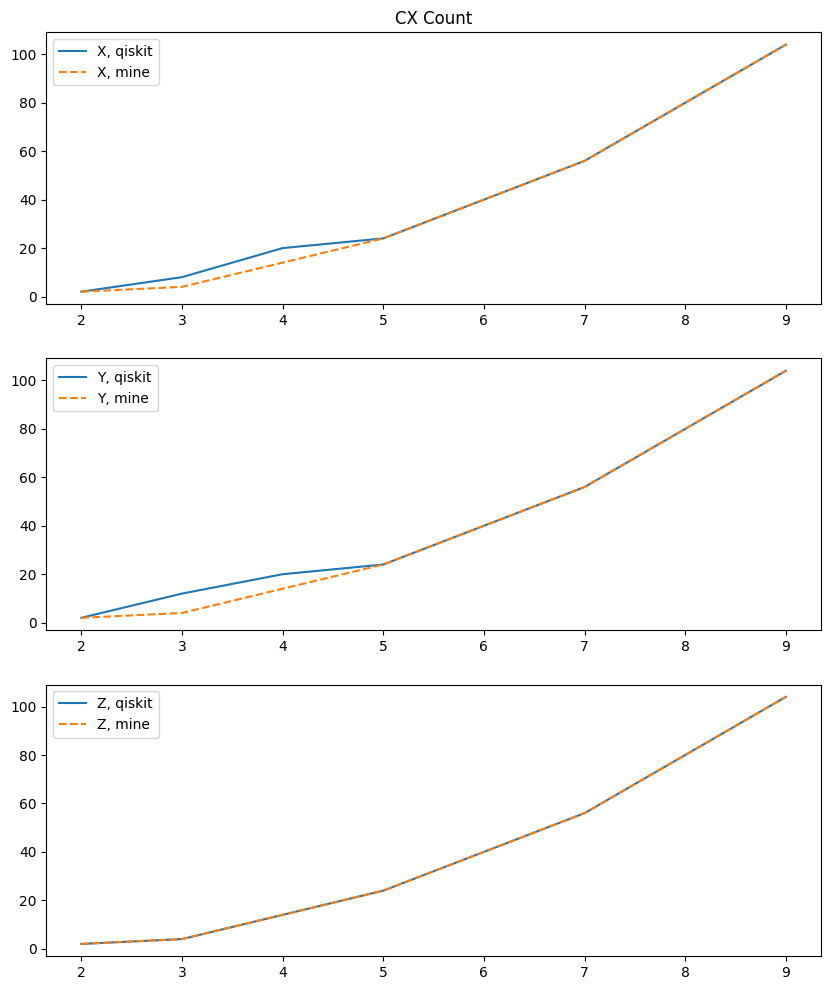

In [41]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(12,6))
fig, ax = plt.subplots(3, figsize=(10, 12))
ax[0].plot(range(2, 10), x_data_cx, label='X, qiskit')
ax[1].plot(range(2, 10), y_data_cx, label='Y, qiskit')
ax[2].plot(range(2, 10), z_data_cx, label='Z, qiskit')
ax[0].plot(range(2, 10), x_data_cx_mine, '--',label='X, mine')
ax[1].plot(range(2, 10), y_data_cx_mine, '--',label='Y, mine')
ax[2].plot(range(2, 10), z_data_cx_mine, '--',label='Z, mine')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_title("CX Count")
plt.show()

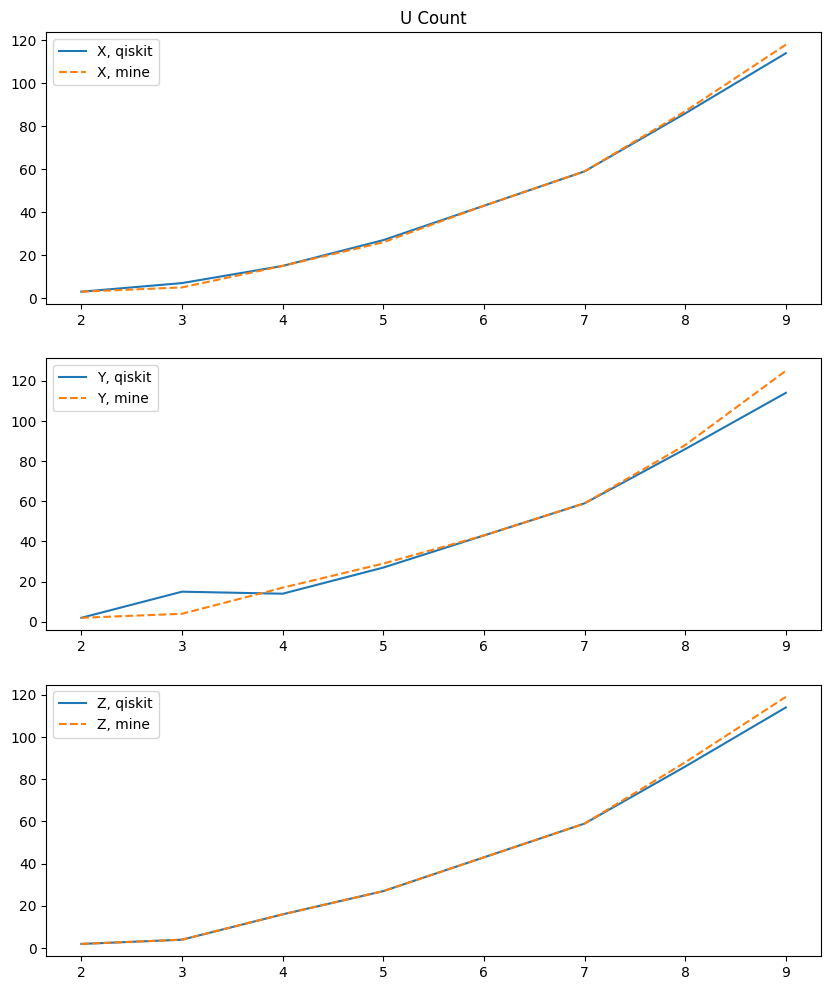

In [42]:
fig, ax = plt.subplots(3, figsize=(10, 12))
ax[0].plot(range(2, 10), x_data_u, label='X, qiskit')
ax[1].plot(range(2, 10), y_data_u, label='Y, qiskit')
ax[2].plot(range(2, 10), z_data_u, label='Z, qiskit')
ax[0].plot(range(2, 10), x_data_u_mine, '--',label='X, mine')
ax[1].plot(range(2, 10), y_data_u_mine, '--',label='Y, mine')
ax[2].plot(range(2, 10), z_data_u_mine, '--',label='Z, mine')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].set_title("U Count")
plt.show()